# Lección 1: Introducción a la Inteligencia Artificial y al Aprendizaje Automático

Autor: Jorge Castro, Fabricio Quirós Corella

---


Este notebook pretende abarcar el siguiente contenido (120 min):
- Consideraciones sobre las herramientas de trabajo. (25 min)
- Introducción a la IA. (35 min)
- Conceptos relacionados con Aprendizaje Automático. (60 min)

## Ambiente de trabajo: Jupyter notebook <a name="1"></a>

El documento que estamos observando corresponde a un [Jupyter notebook](https://jupyter.org/). Este sitio no es una página estática, pero sí consiste en un ambiente interactiva que nos permite escrbir y ejecutar código en Python y en otros lenguajes de programación. Existen dos tipos de celdas en un cuaderno de Jupyter:

* **Celda de código:** maneja líneas de código a ser ejecutadas por el kernel, donde su resulto es desplegado a continuación.
* **Celda de texto:** contiene texto en formato [Markdown](https://www.markdownguide.org/basic-syntax/) y despliega su salida en el mismo lugar de ejecución.

### Celdas de código

Para ejecutar el código en la celda de abajo, selecciónela y ejecute su contenido de las siguientes formas:

* Haga click en el ícono de **Play** en el panel superior.
* Ingresar **Cmd/Ctrl+Enter** para correr la celda en su sitio.
* Ingresar **Shift+Enter** para ejecutar la celda y mover el enfoque a la siguiente celda (se añade una si no existe ninguna).
* Ingresar **Alt+Enter** para correr la celda e insertar una nueva celda de código inmediatamente abajo.

Existen opciones adicionales para la ejecución de algunas o todas las celdas en el menú de **Entorno de ejecución**.

In [3]:
print('esto es un comentario!')

esto es un comentario!


In [6]:
# esto es comentario!

Por ejemplo, corramos un pequeño script en Python que ejecuta una operación, almacena su resultado en una variable y luego la imprime:

In [7]:
workshop_duration = 2 * 60 * 60 #hours*minutes*seconds
print("Duración de la primer sesión del taller de ML con Python:", workshop_duration, "segundos")

Duración de la primer sesión del taller de ML con Python: 7200 segundos


In [8]:
workshop_duration

7200

Cabe resaltar que todas las celdas modifican el mismo estado **global**, por ende las variables definidas al momento de ejecutar una celda puede ser utilizadas en otras celdas:

In [9]:
workshop_duration = workshop_duration * 6
print ("Duración total del taller de Aprendizaje Automático con Python:", workshop_duration, "segundos")

Duración total del taller de Aprendizaje Automático con Python: 43200 segundos


Es posible correr llamadas al sistema mediante **comandos de** `bash` al agregar un signo de exclamación **\!** al inicio de la línea de código:

In [10]:
!echo Hello World

Hello World


Otro ejemplo clásico es el de localizar el directorio donde estamos navegando en nuestro sistema:

In [11]:
!pwd

/home/fquiros/Talleres/Python/MachineLearning/Lecciones


In [12]:
%%time
for i in range(100):
  pass # Do nothing
print('Loop over')

Loop over
CPU times: user 164 µs, sys: 0 ns, total: 164 µs
Wall time: 171 µs


### Celdas de texto

Esto es una **celda markdown**. Haga doble click para editar esta celda. Las celdas de texto emplean sintáxis en formato markdown. Para aprender más al respecto, revisar la [guía markdown](/notebooks/markdown_guide.ipynb).


Es posible de igual form incluir matemáticas a las celdas de texto utilizando [LaTeX](http://www.latex-project.org/). Solamente es cuestión de colocar la declaración entre un par de símbolos de **\$**.

Por ejemplo, `$\sqrt{3x-1}+(1+x)^2$` resulta en $\sqrt{3x-1}+(1+x)^2.$

## Plataformas de trabajo: Google Colaboratory <a name="2"></a>

Google Colab es un archivo interactivo que nos permite escribir, ejecutar y compartir código en Python o en algún otro lenguaje de programación. Esta plataforma hace uso de **cuadernos de Jupyter** alojados en la **nube** y permite la conexión con repositorios alojados como Google Drive. Google Colab conecta el cuaderno a un ambiente de ejecución remoto y emplea una interfaz llamada IPython para la ejecución de código sin comprometer los recursos de las máquinas locales del usuario.

Es posible ejecutar funciones predeterminadas de IPython en Google Colab mediante comandos mágicos.


In [ ]:
%lsmagic

Nótese que estos comandos se pueden ejecutar en líneas y en celdas de código, utilizando `%` y `%%`, respectivamente.

In [ ]:
# List files in current directory
%ls

En el siguiente ejemplo, ejecutamos la medición de tiempo de una visualización en Python de un set de datos de ejemplo.


In [ ]:
%%time
from vega_datasets import data
cars = data.cars()

import altair as alt

# Define the selection interval
interval = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  # Properties like title, width, height can go here
  # The selection parameter is not set directly in properties
).add_params(
    # Add the defined selection parameter to the chart
    interval
)

Se pueden compartir los cuadernos de Jupyter mediante Google Drive o exportándolos desde GitHub. Los cuadernos son almacenados en el formato estándard de Jupyter, para que así puedan ser visualizados con cualquier herramienta compatible.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Es posible también subir y abrir archivos empleando el menú de la barra lateral, o directamente con la celda de código:

In [ ]:
from google.colab import files
file = files.upload()

Acá es posible navegar en el sistema de archivos alojado, mediante el panel que se encuentra a la izquierda, en la opción de **Archivos**.

### Ambiente de ejecución

Existen diferentes ambientes de ejecución con Google Colab empleando múltiples locaciones y recursos:

*   Google Cloud
*   Local
*   Hosted
*   CPU / GPU / TPU
*   Python2 / Python3

Veamos los recursos disponibles en el ambiente de ejecución actual:

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

Podemos revisar información adicional de los recursos disponibles:

In [ ]:
!cat /proc/cpuinfo
!cat /proc/meminfo

Para cambiar el tipo de ambiente de ejecución, siga los siguientes pasos:

1. Navegue al menú de **Entorno de ejecución → Cambiar tipo de entorno de ejecución**
2. Seleccione el **Accelerador de hardware → GPU → Guardar**
3. Navegue al menú de **Entorno de ejecución → Reiniciar entorno de ejecución → Sí**
4. Ahora, el entorno de ejecución debería tener el GPU habilitado


Una vez que cambiamos el entorno de ejecución, podemos revisar los dispositivos disponibles.

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

### Consideraciones de uso

*    Google Colab es de uso libre, pero con capacidades limitadas que se mencionan a continuación.
*    El entorno de ejecución se reinicirá luego de 10-15 minutos de inactividad o de 12 horas de computación continua.
*    Cuando el ambiente de ejecución se reinicia, se pierde toda la información cargada/almacenada y la configuración del ambiente.
*    Los recursos son asignados dinámicamente de acuerdo al tipo de trabajo que se está haciendo.
*    En el caso de trabajos que impliquen computaciones a largo plazo, se sugiere la utilización de hardware dispuesto en un clúster computacional.
*    El manejo de las sesiones activas se realiza desde el menú **Entorno de ejecución → Gestionar sesiones**
*    Con el fin de evitar la pérdida de información y respaldar el trabajo realizado cuando el entorno de ejecución se reinicia, se sugiere de igual forma conectar su almacenamiento en Google Drive a Colab.

In [ ]:
# Run this code to mount your google drive in your Colab virtual machine
from google.colab import drive
drive.mount('/content/drive')

Podemos inspeccionar mediante llamadas al sistema el directorio en Drive montado correctamente, donde se encuentra almacenado el material del curso:

In [ ]:
!ls /content/drive/MyDrive/MachineLearning/

## Plataformas de trabajo: Supercomputador Kabré


Es posible ejecutar nuestros cuadernos de Jupyter en el clúster computacional del CNCA. Una vez que complete los pasos del alojamiento dados en el instructivo, acceda al clúster [Kabré](https://kabre.cenat.ac.cr:8000/hub/login) gracias a las credenciales brindadas, donde puede navegar en su sistema de archivos (`/home/<username>`) dentro del clúster.

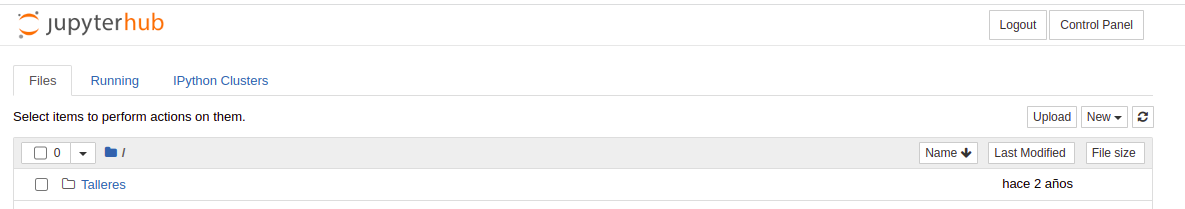

Desde el botón de **Upload**, puede cargar este documento en el directorio de su preferencia. De ahí, correr las celdas de código y editar celdas de texto. Entre las ventajas del uso de un alojamiento en un recurso computacional de alto rendimiento, son los beneficios en cuánto almacenamiento y procesamiento. Plataformas en línea pueden tener mayores limitaciones si no se maneja la versión paga.

Es posible ejecutar las mismas llamadas al sistema como si estuviéramos en Colab y así explorar nuestro alojamiento en el clúster.

In [13]:
!ls /home/fquiros/Talleres/Python/MachineLearning

Lecciones  Práctica_Extra.ipynb  Soluciones  datasets


In [14]:
!pwd

/home/fquiros/Talleres/Python/MachineLearning/Lecciones


## Historia de la IA

- Origen: conferencia en Dartmouth College en 1956.
- Fundadores: Claude Shanon, John McCarty, entre
otros.
- Proyecto de investigación: interesados en "inteligencia artificial".
- Objetivo: descripción precisa de atributos asociados a aprendizaje y/o inteligencia, para que sea posible desarrollar una máquina que los simule.

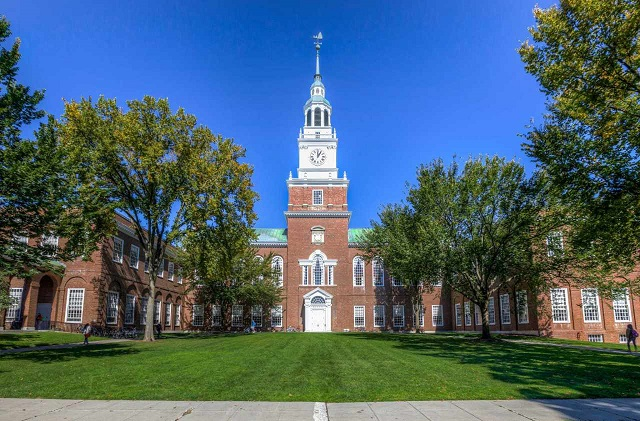

Dartmouth College, New Hampshire

## Oleajes de la IA

- 1956-1974: Computación Simbólica, Perceptrón.
- 1980-1987: Sistemas Expertos, ANNs: MLP y back-propagation.
- 1993-2011: Agentes inteligentes, CNNs, Deep Learning.
- 2011-presente: Big Data, HPC, GANs, GenAI.

## Aplicaciones de la IA

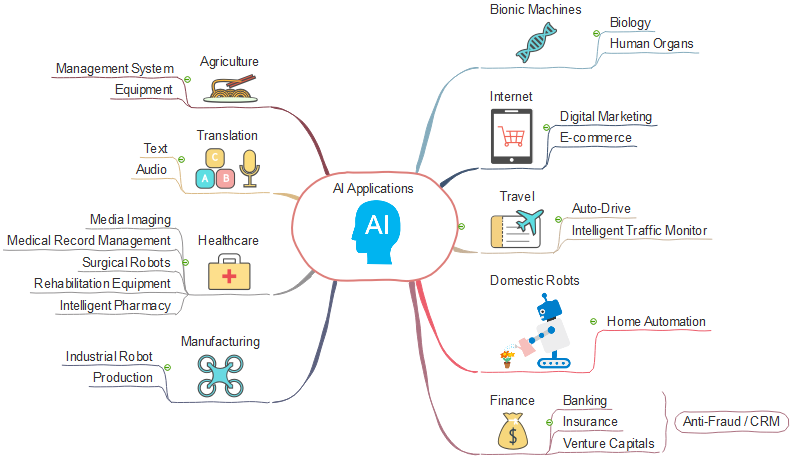

## Conceptos de la IA y el Aprendizaje Automático

Antes de definir Aprendizaje Automático, es necesario establecer y diferenciar una serie de conceptos. Obsérvese el siguiente diagrama.

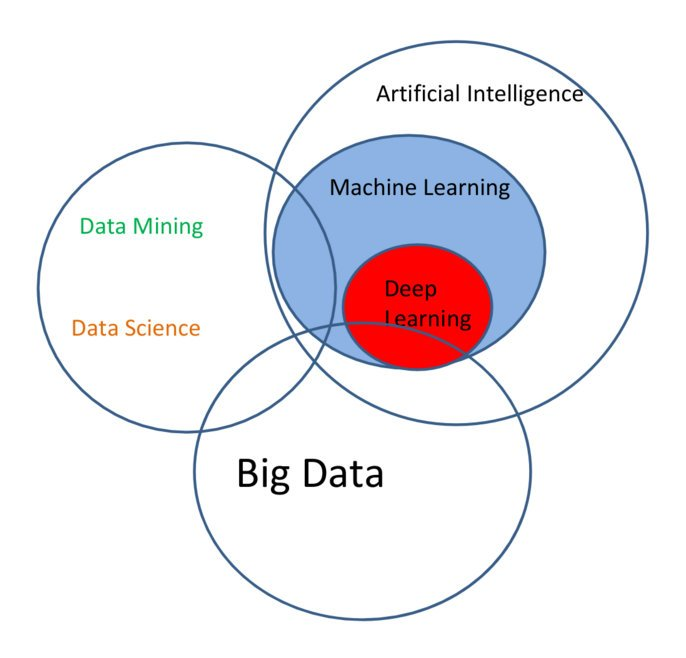


**Data Science:** aplicación de métodos científicos, procesos y sistemas para obtener conocimiento de un conjunto de datos en sus diferentes formas. En cuánto a **la minería de los datos** o *data mining*, esta etapa procura extraer información de un conjunto de datos y transformarla en una estructura comprensible para su uso posterior. Supone la gestión y la manipulación del set de datos mediante el uso de técnicas estadísticas y de las ciencias de la computación.

**Big Data:** incremento de bases de datos de forma tal que  se supera la capacidad del software convencional para ser capturados, administrados y procesados en un tiempo razonable. El volumen de los datos masivos crece constantemente. Esto supone la resolución de tareas más complejas.

**Artificial Intelligence**: estudio y desarrollo de técnicas que implementan sistemas informáticos cuyas tareas simulan capacidades asociadas al aprendizaje y/o a la inteligencia humana. Los seres humanos actuamos o tomamos decisiones ante la experiencia y las condiciones de nuestro entorno. La IA corresponde al estudio de agentes informáticos que implementen estas capacidades de procesos cognitivos.

**Machine Learning:** subárea de la IA enfocada en proveer a los sistemas computacionales la habilidad para aprender y mejorar automáticamente a través de la experiencia, sin estar explícitamente programado. En términos generales el aprendizaje automático (ML) puede ser supervisado, no supervisado o por reforzamiento.

### Tipos de Aprendizaje Automático

En el **aprendizaje supervisado**, se desarrollan algoritmos que requieren de ejemplos de entrenamiento para los cuales se conoce de antemano la salida correcta (etiqueta). Por ejemplo, si se deseara reconocer automáticamente si hay o no gansos en una imagen, se debería primero elaborar un **conjunto de entrenamiento**, compuesto por imágenes que contienen gansos e imágenes que no contienen gansos y sus respectivas etiquetas. Una vez entrenado el algoritmo se usaría un conjunto de prueba nunca antes visto por el algoritmo para evaluar su capacidad de predicción.

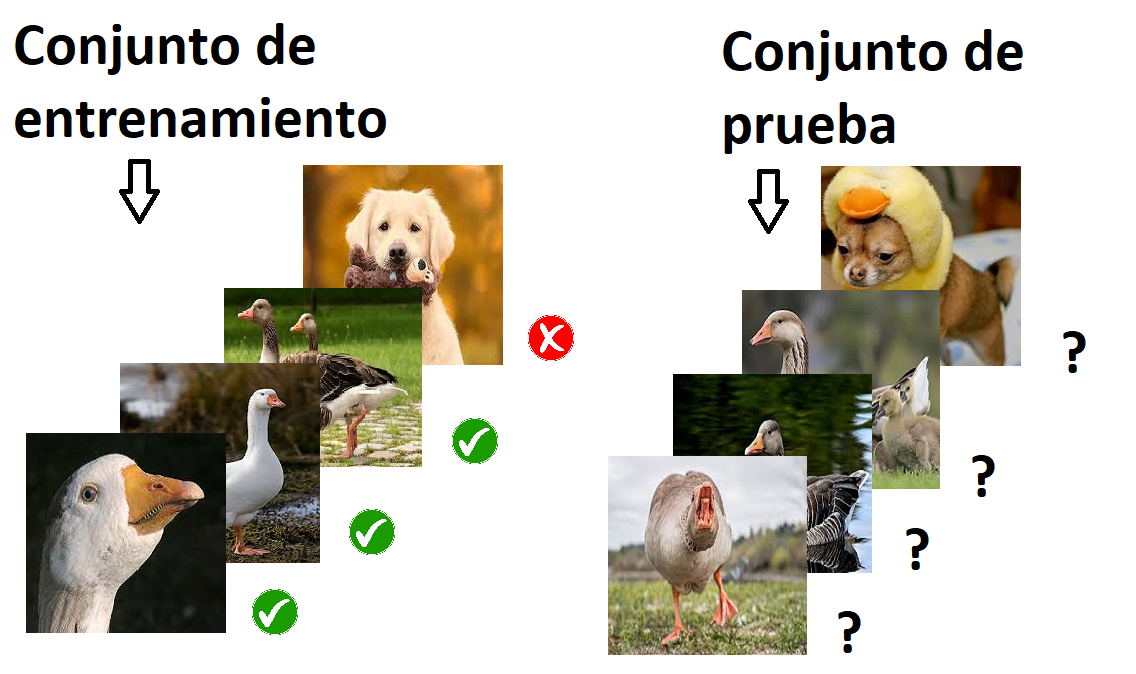

En el **aprendizaje no supervisado**, se desarrollan algoritmos que tratan de encontrar la estructura subyacente o patrones presentes en datos no etiquetados (para los cuales se desconoce la salida deseada). Por ejemplo, si deseáramos agrupar artículos similares en una página de comercio electrónico como Amazon, se podrían usar algoritmos de agrupamiento no supervisado para construir las categorías. De la misma forma, podríamos usar este enfoque si quisiéramos agrupar imágenes de animales no etiquetadas de acuerdo a la clase a la que pertenecen.

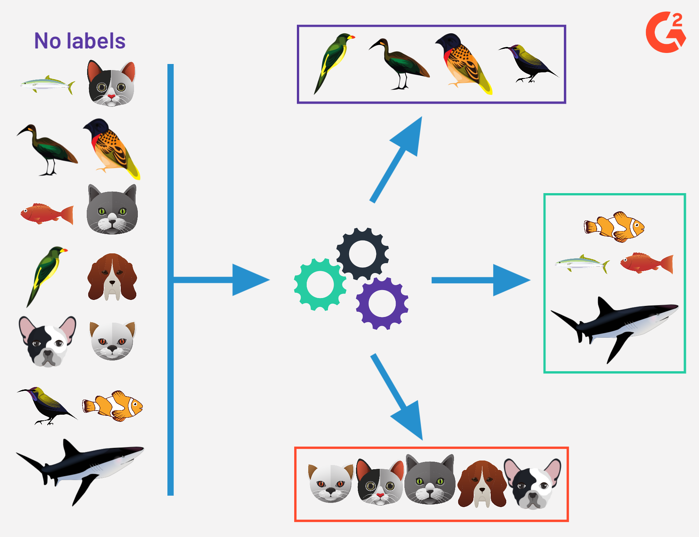

En el **aprendizaje por reforzamiento**, se desarrollan algoritmos que buscan optimizar las acciones a tomar para obtener una recompensa en una situación en particular. Por ejemplo, para el juego de ajedrez, el programa [Alpha-Zero](https://en.wikipedia.org/wiki/AlphaZero) dessarollado por [DeepMind](https://en.wikipedia.org/wiki/DeepMind) fue entrenado bajo un esquema de aprendizaje por reforzamiento. Para esto, se definió el conjunto de acciones válidas a ejecutar (movimientos legales de acuerdo a las reglas del ajedrez) y la recompensa (ganar el juego, o en otras palabras, ejecutar un jaque mate). Después de tan solo 9 horas de entrenamiento del programa jugando partidas contra sí mismo,  fue capaz de vencer al [motor](https://en.wikipedia.org/wiki/Stockfish_(chess)) más poderoso de ajedrez hasta el momento, cuyo nivel está muy por encima del [campeón](https://en.wikipedia.org/wiki/Magnus_Carlsen) mundial de ajedrez.

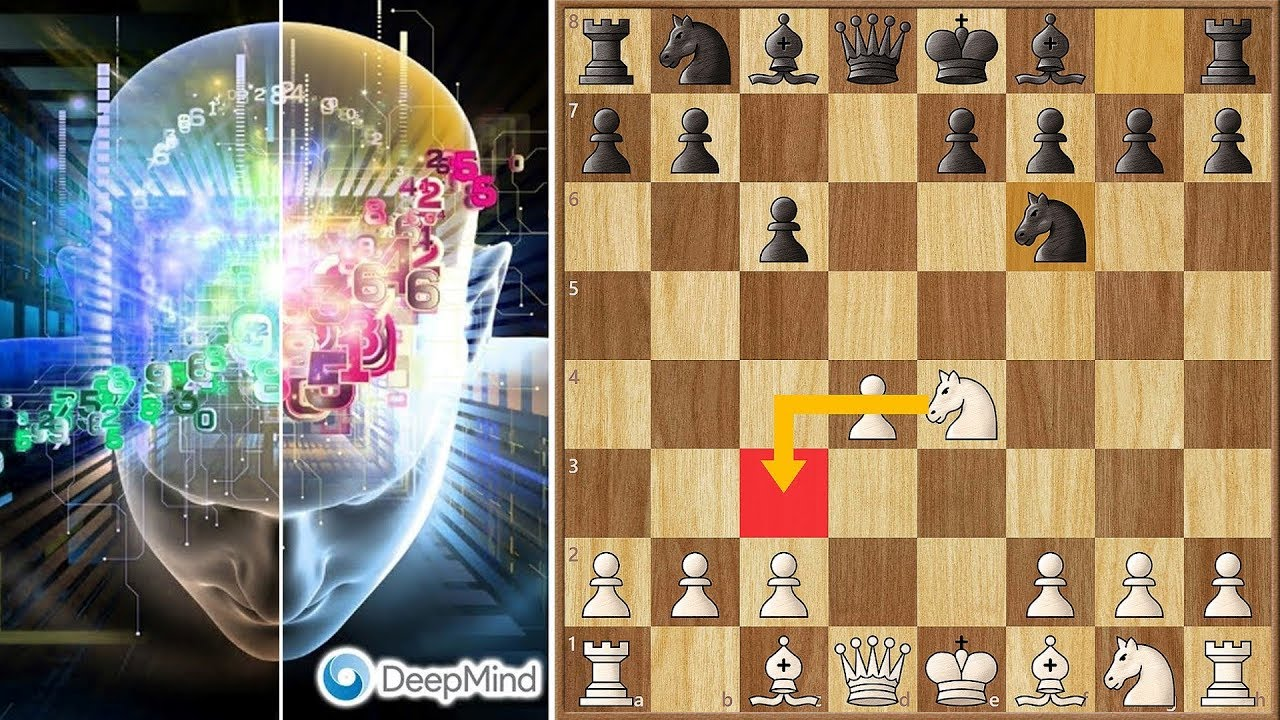

Existen otros enfoques de ML en adición a los mencionados anteriormente, como el aprendizaje **semi-supervisado**, así como el caso reciente de aprendizaje **auto-supervisado**. En este curso nos enfocaremos únicamente en los enfoques de aprendizaje **supervisado** y **no supervisado**.

**QUIZ SOBRE IDENTIFICACIÓN DEL TIPO DE APRENDIZAJE**

Supongamos que lideramos el área tecnológica de un comercio electrónico y deseamos construir un algoritmo para hacer una segmentación de los clientes basándonos en algunos atributos de los mismos. Este es un ejemplo de aprendizaje:

- Supervisado
- No supervisado
- Por reforzamiento
- Ninguna de las anteriores

Supongamos que deseamos construir un algoritmo que, a partir de los correos que marcamos como spam, aprenda a predecir en el futuro cuales correos son spam. Este es un ejemplo de aprendizaje:

- Supervisado
- No supervisado
- Por reforzamiento
- Ninguna de las anteriores

Imaginemos que desarrollamos un sistema con la habilidad de realizar operaciones financieras. Este sistema ejecuta múltiples operaciones financieras y aprende progresivamente bajo que condiciones realizar cada operación según la pérdida o ganancia de cada transacción financiera realizada. Este es un ejemplo de aprendizaje:

- Supervisado
- No supervisado
- Por reforzamiento
- Ninguna de las anteriores

## Áreas de aplicación del Aprendizaje Automático

- **Procesamiento del lenguaje natural** (NLP): subcampo de la lingüística, ciencia computacional, informática e inteligencia artificial que estudia la interacción entre las computadoras y los lenguajes humanos naturales. Algunos de los retos de esta área involucran el reconocimiento del habla, reconocimiento de la escritura, entendimiento del lenguaje natural y generación de lenguaje natural. Algunas aplicaciones famosas del NLP son:
  - Google Speech Recognition
  - Cortana de Microsoft
  - Alexa de Amazon
  - Grammarly

- **Visión por computador** (CV): área cientifica interdisciplinaria que estudia cómo las computadoras pueden obtener un entendimiento de alto nivel a partir de imágenes digitales y videos. Entre los principales retos en esta área están la detección de objetos, rastreo en videos, detección de eventos, reconstrucción de escenas y restauración de imágenes. Algunas aplicaciones famosas de la CV son:
  - Vehículos autónomos
  - Búsqueda de artículos con fotos
  - Tecnología de reconocimiento facial

- **Sistemas de recomendación** (RS): son sistemas de filtrado de información que permiten predecir el nivel de preferencia que un usuario daría a un artículo. Algunas de las empresas más conocidas que usan RS son:
  - Spotify
  - Netflix
  - Amazon
  - Facebook
  - Youtube

- **Servicios financieros** (FS): Las empresas del sector financiero pueden identificar puntos clave en los datos financieros, así como prevenir cualquier ocurrencia de fraude financiero, con la ayuda de la tecnología de aprendizaje automático. La tecnología también se utiliza para identificar oportunidades de inversión y comercio y predecir movimientos en la bolsa de valores. Algunos de las empresas financieras más famosas en incoorporar diferentes aplicaciones del aprendizaje automático son:
  - Wells Fargo
  - Bank of America
  - HSBC

### Conjuntos de datos para Aprendizaje Automático

- UCI: https://archive.ics.uci.edu/datasets

- Kaggle: https://www.kaggle.com/datasets

### Principales bibliotecas en Python  

- **ML/DL**: scikit-learn, Keras, TensorFlow, PyTorch.

- **NLP**: NLTK, Gensim, SpiCy, Pattern, TextBlob.

- **CV**: scikit-image, OpenCV, Scipy, Pillow, Mahotas.

- **RS**: surprise, Lightfm, spotlight, RecQ, music-recommender.

- **FS**: QuantLib, PyAlgoTrade, pandas.

## Práctica 1

Luego de registrarse en el sitio de Kaggle, realice la siguiente práctica:

1.   Descargue el archivo CSV asociado en el siguiente enlace: [Disease Symptoms and Patient Profile Dataset](https://www.kaggle.com/datasets/uom190346a/disease-symptoms-and-patient-profile-dataset?resource=download).
2.   Cargue dicho archivo en su ambiente de trabajo ya sea Google Colaboratory o el supercomputador Kabré. Asegúrese que este fue cargado correctamente.
3.   Añada una celda de código que despliegue el contenido del CSV.
4.   ¿Cúales son las variables que contiene este conjunto de datos? Utilice una celda de texto para hacer la descripción del set de datos.

In [ ]:
# Puede realizar su práctica aquí